In [1]:
# pip install pycaret

In [2]:
# pip install scikit-learn

In [3]:
# pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *
from pycaret.regression import create_model, tune_model, evaluate_model, compare_models, get_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/feature_eng_stock.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,Ticker_numeric,Company_Name_numeric
0,2023-12-29,50.30,50.57,49.77,50.25,49.59,29266500,0.000049,NaN,NaN,NaN,NaN,NaN,NaN,1451.325735,20,21
1,2023-12-28,50.81,50.87,50.16,50.39,49.72,27705200,-0.000083,NaN,NaN,NaN,NaN,NaN,NaN,1377.502544,20,21
2,2023-12-27,50.63,51.28,50.19,50.76,50.09,52148000,0.000186,NaN,NaN,NaN,NaN,NaN,NaN,2612.093320,20,21
3,2023-12-26,48.92,50.52,48.71,50.50,49.83,60287400,0.000534,NaN,NaN,NaN,NaN,NaN,NaN,3004.121142,20,21
4,2023-12-22,47.25,48.16,47.20,48.00,47.37,30053700,0.000200,NaN,NaN,NaN,NaN,NaN,NaN,1423.643769,20,21


In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(df1['Date'], df1['Close'], label='Close Price')
# plt.title('Stock Closing Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

In [ ]:
print(df1.dtypes)

Date                     object
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
garman_klass_vol        float64
rsi                     float64
bb_low                  float64
bb_mid                  float64
bb_high                 float64
atr                     float64
macd                    float64
dollar_volume           float64
Ticker_numeric            int64
Company_Name_numeric      int64
dtype: object


In [ ]:
# Ensure that 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Define train and test date ranges
train_start_date = pd.to_datetime('2010-01-01')
train_end_date = pd.to_datetime('2015-01-01')

test_start_date = pd.to_datetime('2015-01-01')
test_end_date = pd.to_datetime('2016-01-01')

In [ ]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric'],
      dtype='object')

In [ ]:
df1.dropna(inplace=True)

In [ ]:
# Split train data
train_data = df1[(df1['Date'] >= train_start_date) & (df1['Date'] < train_end_date)]

# Split test data
test_data = df1[(df1['Date'] >= test_start_date) & (df1['Date'] < test_end_date)]

# Check the result
print("Training data:", train_data.shape)
print("Test data:", test_data.shape)

Training data: (38477, 17)
Test data: (8288, 17)


In [ ]:
# Define the features (e.g., Open, High, Low) and target (e.g., Close)
X_train = train_data[['Open', 'High', 'Low', 'Volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_train = train_data['Close']  # Target variable for training

X_test = test_data[['Open', 'High', 'Low', 'Volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_test = test_data['Close']  # Target variable for testing

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.15119127447314398


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.9998866173224524


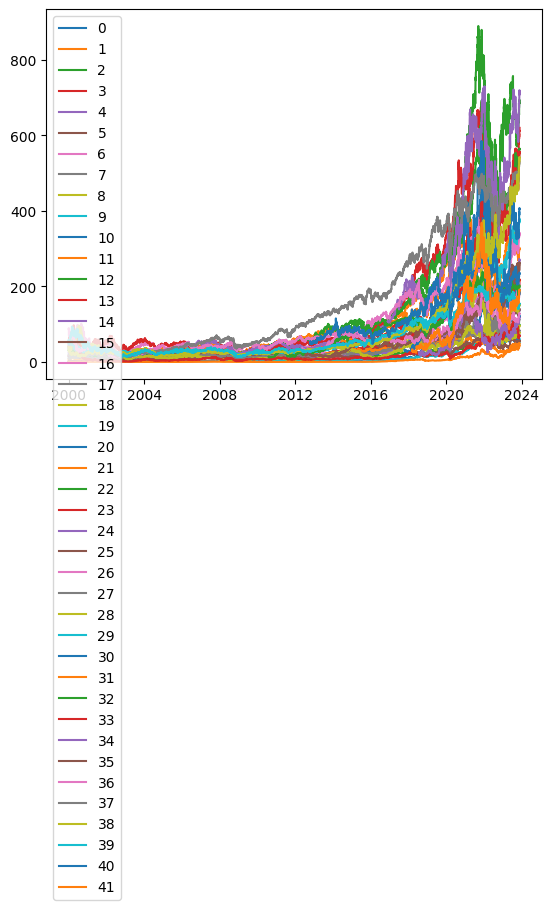

In [ ]:
##we can perform a separate analysis of each company's
##stock price performance and compare them using various models
##After training models for each company, you can compare key metrics such as:

##Mean Squared Error (MSE)
##R-squared values
##Accuracy (if using a classification model)
#Trends in stock price prediction
company_groups = df1.groupby('Company_Name_numeric')
for company_name, group in company_groups:
    plt.plot(group['Date'], group['Close'], label=company_name)
plt.legend()
plt.show()

In [ ]:
# Initialize your model
model = LinearRegression()

# Set up the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Assuming 'X' is the feature matrix and 'y' is the target variable (e.g., stock prices)
# Perform cross-validation and calculate MSE
cross_val_mse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate the average cross-validated MSE
avg_mse = np.mean(-cross_val_mse)
print(f"Average Cross-Validated MSE: {avg_mse}")

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Evaluate the model on a separate test set
y_pred_test = model.predict(X_test)

# Calculate MSE and R-squared for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set MSE: {mse_test}")
print(f"Test Set R-squared: {r2_test}")

# Check for overfitting by comparing cross-validated MSE with test set MSE
if mse_test > avg_mse:
    print("The model may be overfitting as the test set error is higher than the cross-validated error.")
else:
    print("The model generalizes well as the test set error is similar to the cross-validated error.")

Average Cross-Validated MSE: 0.05972806854709519
Test Set MSE: 0.15119127447314398
Test Set R-squared: 0.9998866173224524
The model may be overfitting as the test set error is higher than the cross-validated error.


In [ ]:
regression_setup = setup(data=df1, target='Close', session_id=123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(184715, 17)"
4,Transformed data shape,"(184715, 19)"
5,Transformed train set shape,"(129300, 19)"
6,Transformed test set shape,"(55415, 19)"
7,Numeric features,15
8,Date features,1
9,Preprocess,True


In [ ]:
# Compare different models and rank them based on performance metrics
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4853,1.0020,1.0006,0.9999,0.0214,0.0191,1.7960
dt,Decision Tree Regressor,0.4606,1.3478,1.1607,0.9999,0.0118,0.0077,3.9040
rf,Random Forest Regressor,0.3364,0.6480,0.8045,0.9999,0.0082,0.0058,254.7090
et,Extra Trees Regressor,0.3428,0.5607,0.7484,0.9999,0.0084,0.0062,80.9010
ridge,Ridge Regression,0.4847,1.0020,1.0006,0.9999,0.0211,0.0189,0.2450
br,Bayesian Ridge,0.4852,1.0020,1.0006,0.9999,0.0213,0.0191,0.2730
llar,Lasso Least Angle Regression,0.6355,1.6434,1.2815,0.9998,0.0248,0.0258,0.3140
lightgbm,Light Gradient Boosting Machine,0.7011,3.1374,1.7701,0.9997,0.0224,0.0254,6.6960
xgboost,Extreme Gradient Boosting,0.6650,2.8826,1.6949,0.9997,0.0200,0.0181,1.7230
gbr,Gradient Boosting Regressor,0.8626,2.4305,1.5584,0.9997,0.0314,0.0374,77.3220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Train the Random Forest Regressor
rf_model = create_model('rf')

# Train the Extra Trees Regressor
et_model = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:32:04
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
plot_model (best_model, plot='residuals')

In [ ]:
plot_model (best_model, plot='error')

In [ ]:
plot_model (best_model, plot='feature')

In [ ]:
evaluate_model(best_model)

In [ ]:
holdout_pred=predict_model(best_model)
holdout_pred.head()

# This is our deep learning model to improve the MSE

In [ ]:
# Get training and test data from PyCaret
X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

In [ ]:
# Try different hyperparameters for the MLP Regressor
mlp_tuned = MLPRegressor(hidden_layer_sizes=(200, 100), activation='tanh', solver='adam', max_iter=2000, random_state=42)
mlp_tuned.fit(X_train_scaled, y_train)

# Predict and evaluate the tuned MLP model
y_pred_mlp_tuned = mlp_tuned.predict(X_test_scaled)
mlp_tuned_mse = mean_squared_error(y_test, y_pred_mlp_tuned)
print(f'Tuned MLP Regressor MSE: {mlp_tuned_mse}')

In [ ]:
# Define a deeper model for tuning
model_tuned = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the tuned model
model_tuned.compile(optimizer='adam', loss='mse')

# Train the tuned model
history_tuned = model_tuned.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict and evaluate the tuned deep learning model
y_pred_dl_tuned = model_tuned.predict(X_test_scaled)
dl_tuned_mse = mean_squared_error(y_test, y_pred_dl_tuned)
print(f'Tuned Deep Learning Regressor MSE: {dl_tuned_mse}')

In [ ]:
# Define the model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Using 'neg_mean_squared_error' to evaluate the model, as cross_val_score returns negative MSE to maximize it
scores = cross_val_score(mlp_regressor, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative scores to positive and calculate average MSE
mse_scores = -scores
mean_mse = mse_scores.mean()

print(f"MSE scores for each fold: {mse_scores}")
print(f"Mean MSE from cross-validation: {mean_mse}")


In [ ]:
# Define a deeper model for tuning with regularization and dropout
model_improved = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(1)
])

# Compile the improved model
model_improved.compile(optimizer='adam', loss='mse')

# Train the improved model
history_improved = model_improved.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict and evaluate the improved deep learning model
y_pred_dl_improved = model_improved.predict(X_test_scaled)
dl_improved_mse = mean_squared_error(y_test, y_pred_dl_improved)
print(f'Improved Deep Learning Regressor MSE: {dl_improved_mse}')


In [ ]:
# Define an updated model with reduced regularization and dropout rates
model_updated = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # Reduced L2 Regularization
    layers.Dropout(0.2),  # Reduced Dropout layer with 20% rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),  # Reduced Dropout layer with 20% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the updated model
model_updated.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the updated model
history_updated = model_updated.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2,
                                    callbacks=[early_stopping], verbose=0)

# Predict and evaluate the updated deep learning model
y_pred_dl_updated = model_updated.predict(X_test_scaled)
dl_updated_mse = mean_squared_error(y_test, y_pred_dl_updated)
print(f'Updated Deep Learning Regressor MSE: {dl_updated_mse}')

# Plot training and validation loss
plt.plot(history_updated.history['loss'], label='Training Loss')
plt.plot(history_updated.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Define an updated model with reduced complexity and increased dropout rate
model_further_improved = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the improved model
model_further_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Define early stopping callback with increased patience
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the further improved model
history_further_improved = model_further_improved.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2,
                                                      callbacks=[early_stopping], verbose=0)

# Predict and evaluate the further improved deep learning model
y_pred_dl_further_improved = model_further_improved.predict(X_test_scaled)
dl_further_improved_mse = mean_squared_error(y_test, y_pred_dl_further_improved)
print(f'Further Improved Deep Learning Regressor MSE: {dl_further_improved_mse}')

# Plot training and validation loss
plt.plot(history_further_improved.history['loss'], label='Training Loss')
plt.plot(history_further_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Further Improved Model)')
plt.show()
